In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

# j=17
# for i in range(16):

#   flip_v = np.flip(img_list[i],0)
#   flip_h = np.flip(img_list[i],1)
#   v=dir+str(j)+'.jpg'  
#   cv2.imwrite(v,flip_v)
#   j=j+1
#   h=dir+str(j)+'.jpg'
#   cv2.imwrite(h,flip_h)
#   j=j+1

In [ ]:

dir = "/content/drive/My Drive/smart_kitchen/onion_image_dataset/"
img_list = []
dim = (480,480)
total=48
for i in range(48):
  print(i)
  fname = dir+str(i)+'.jpg'
  img = cv2.imread(fname)
  img = cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
  img_list.append(img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


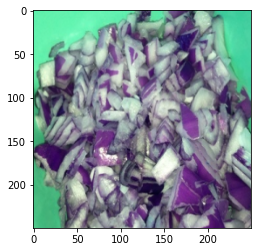

In [ ]:

y1=150
y2=400
x1=150
x2=400
img=img_list[0][y1:y2, x1:x2]
plt.imshow(img)

In [ ]:
img_list_cropped=[]
for img in img_list:
  img_list_cropped.append(img[y1:y2, x1:x2])


In [ ]:

# j=17
# for i in range(16):

#   flip_v = np.flip(img_list_cropped[i],0)
#   flip_h = np.flip(img_list_cropped[i],1)
#   v=dir+str(j)+'.jpg'  
#   cv2.imwrite(v,flip_v)
#   j=j+1
#   h=dir+str(j)+'.jpg'
#   cv2.imwrite(h,flip_h)
#   j=j+1

0


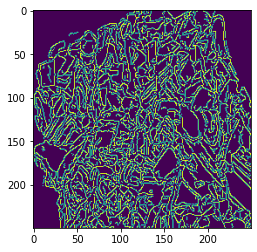

1


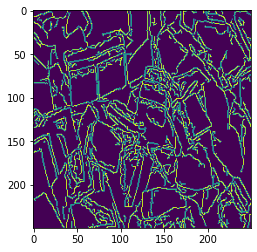

2


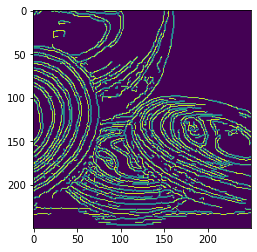

3


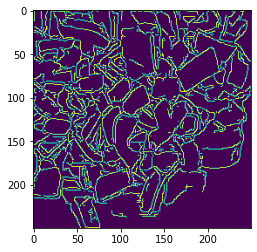

4


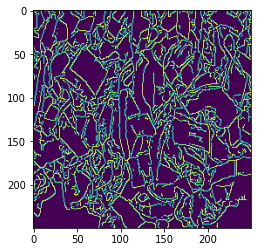

5


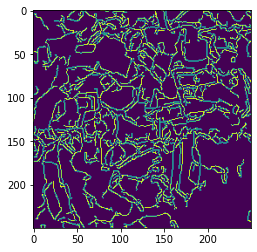

6


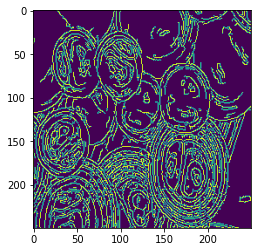

7


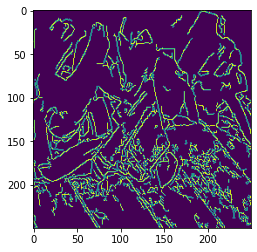

8


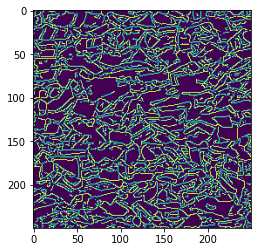

9


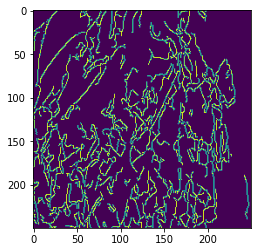

10


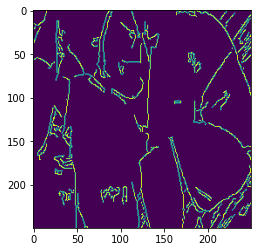

11


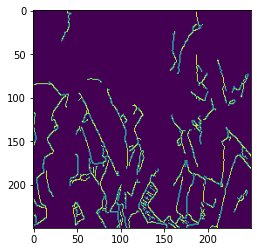

12


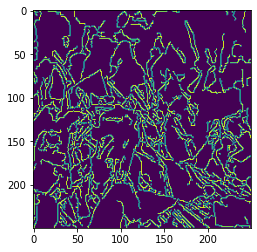

13


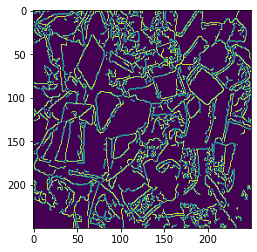

14


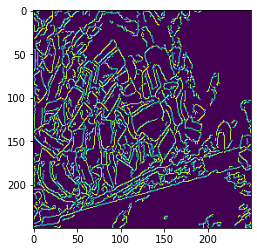

15


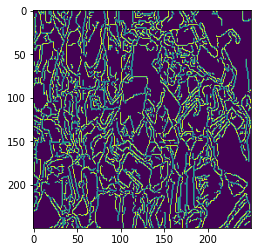

16


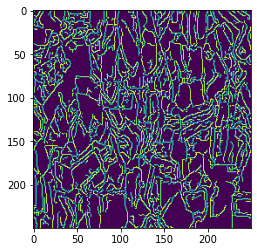

17


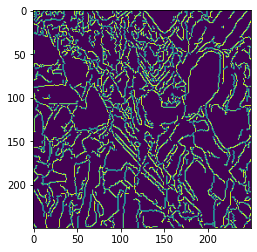

18


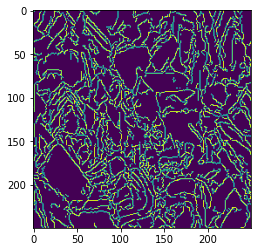

19


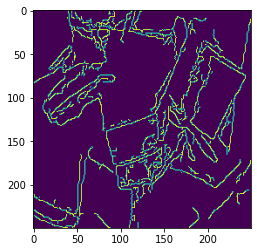

20


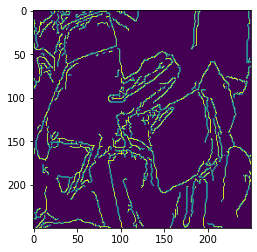

21


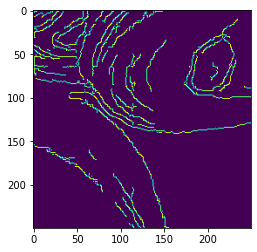

22


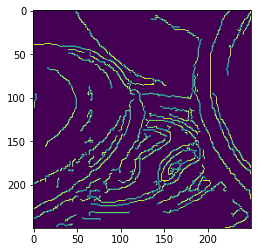

23


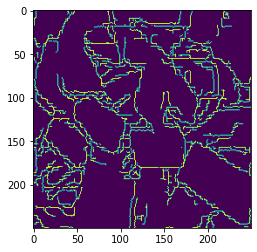

24


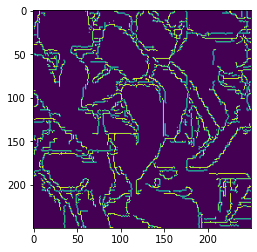

25


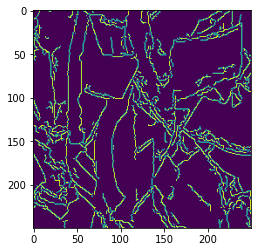

26


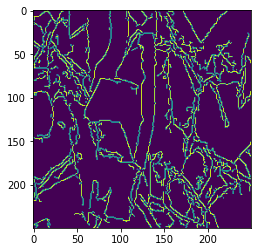

27


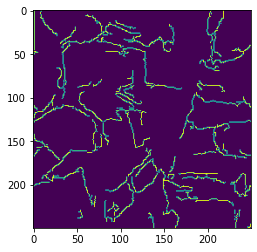

28


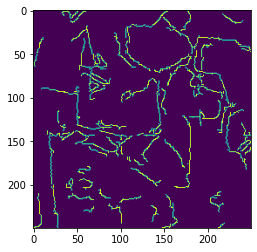

29


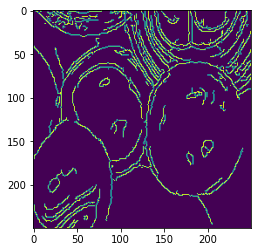

30


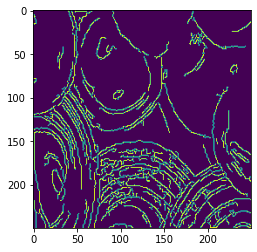

31


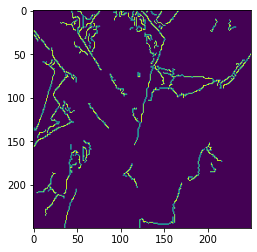

32


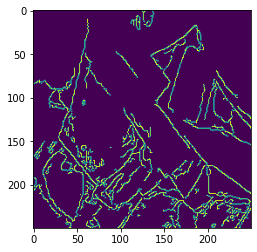

33


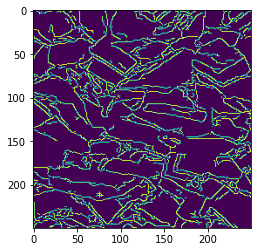

34


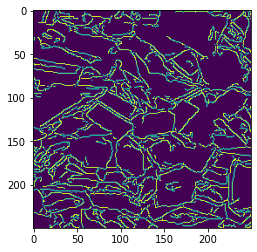

35


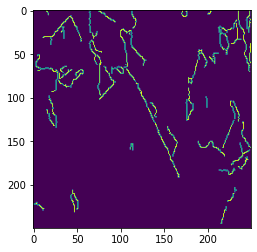

36


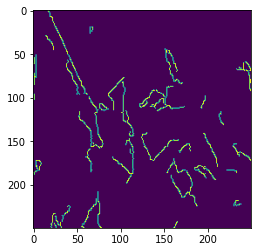

37


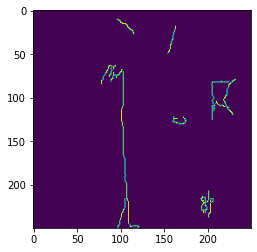

38


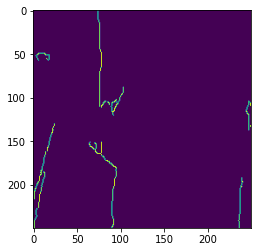

39


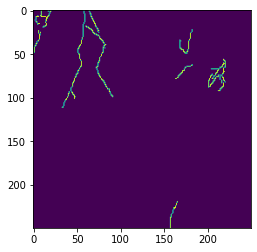

40


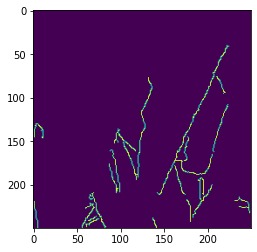

41


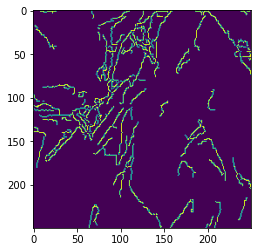

42


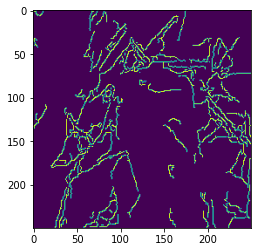

43


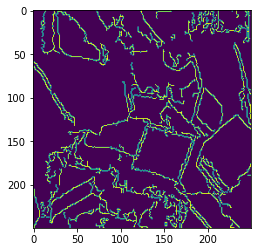

44


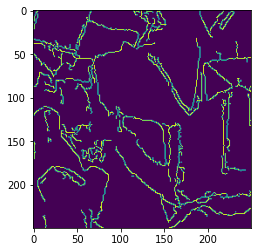

45


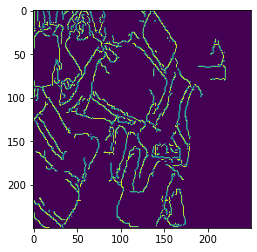

46


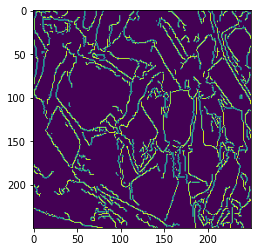

47


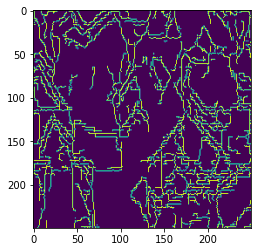

In [ ]:
edge_list=[]

# import cv2


from sklearn.decomposition import PCA
pca = PCA(n_components=10)

i=0
for img in img_list_cropped:
  print(i)
  i=i+1
  edges = cv2.Canny(img,50,130)

  edge_list.append(edges.flatten())
  plt.imshow(edges)
  plt.show()

edge_list_pca=pca.fit_transform(edge_list)


In [ ]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(edge_list_pca)
lab=kmeans.labels_
common=3
pp = np.vstack([lab,np.arange(total)])
print("labels")
print(pp)
# print("non_zero",np.argwhere(lab!=common).flatten())
# print("xxxxxx", np.arange(20))


labels
[[ 2  6  8 11  5 11  7  8  4 11  0  0  8  9  8  3  1 11 10  0  0  0  0  0
   0  0 11  0  0  0  0  0  0 11 11  0  0  0  0  0  0  0  0  0  0  0  0 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]


15  3


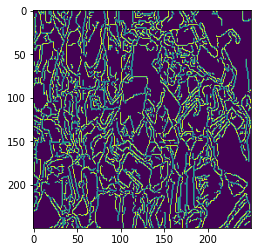

In [ ]:
for ind, l in enumerate(lab):
  if l==3: 
    print(str(ind)+"  "+str(l))
    plt.imshow(edge_list[ind].reshape(edges.shape))
    plt.show()

Text(0.5, 1.0, 'Elbow curve')

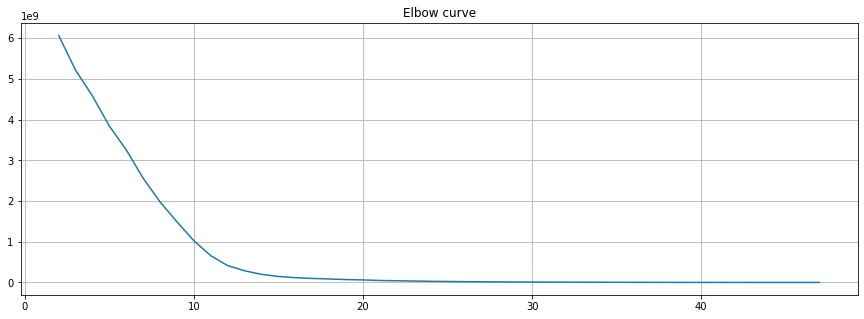

In [ ]:
from matplotlib import pyplot as plt

X =edge_list_pca
distorsions = []
for k in range(2, total):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, total), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
from sklearn.cluster import DBSCAN

X =edge_list_pca
clustering = DBSCAN(eps=6, min_samples=10).fit(X)
lab=clustering.labels_

pp = np.vstack([lab,np.arange(total)])
print("labels")
print(pp)

labels
[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]]
